In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from ipyleaflet import Map, CircleMarker, basemaps

main_df = pd.read_csv('../data/raw/PROCESSED_DF.csv')
main_df.head(3)

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.21,365.0
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.38,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,0.00,365.0


In [2]:
main_df = main_df.drop(['id'], axis=1)
main_df.head(3)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.21,365.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.38,355.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,0.00,365.0


<h3>Relación entre el nombre del alojamiento y el número de reviews</h3>

In [3]:
main_df['name_len'] = main_df['name'].str.len()

longer_name = main_df.loc[main_df['name_len'].idxmax()]
shorter_name = main_df.loc[main_df['name_len'].idxmin()]

print(f'Longer name with {longer_name["name_len"]} characters:\n{longer_name["name"]}\n')
print(f'Shorter name with {shorter_name["name_len"]} characters:\n{shorter_name["name"]}\n')

Longer name with 179 characters:
The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!

Shorter name with 1 characters:
/



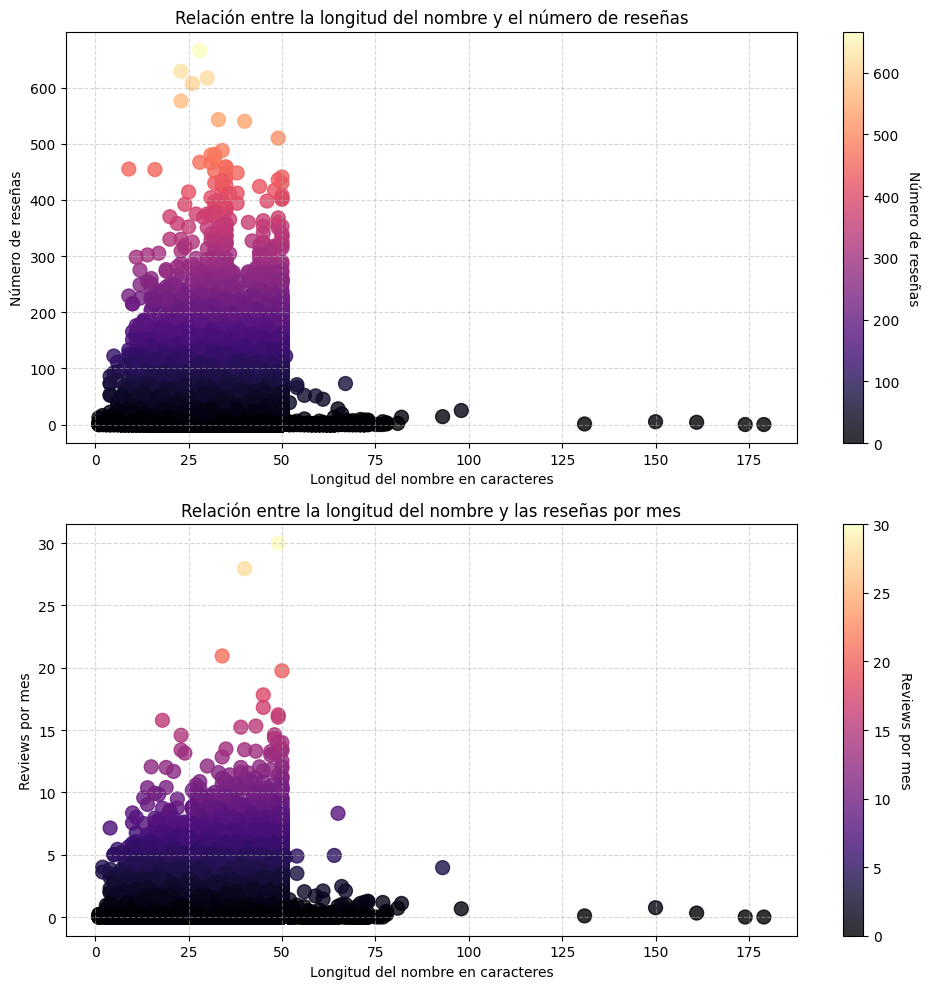

In [4]:
fig, axis = plt.subplots(2, 1, figsize=(10, 10))

# Number of reviews related with name leng
sc1 = axis[0].scatter(main_df['name_len'], main_df['number_of_reviews'], c=main_df['number_of_reviews'], cmap='magma', s=100, alpha=0.8)
cbar1 = fig.colorbar(sc1, ax=axis[0])
cbar1.set_label('Número de reseñas', rotation=270, labelpad=15)

axis[0].set_title('Relación entre la longitud del nombre y el número de reseñas')
axis[0].set_xlabel('Longitud del nombre en caracteres')
axis[0].set_ylabel('Número de reseñas')
axis[0].grid(True, linestyle='--', alpha=0.5)

# Reviews per month related with name leng
sc2 = axis[1].scatter(main_df['name_len'], main_df['reviews_per_month'], c=main_df['reviews_per_month'], cmap='magma', s=100, alpha=0.8)
cbar2 = fig.colorbar(sc2, ax=axis[1])
cbar2.set_label('Reviews por mes', rotation=270, labelpad=15)

axis[1].set_title('Relación entre la longitud del nombre y las reseñas por mes')
axis[1].set_xlabel('Longitud del nombre en caracteres')
axis[1].set_ylabel('Reviews por mes')
axis[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

En estos casos se puede apreciar una clara tendencia a la baja en cuanto a las reseñas para alojamientos con nombres muy largos, y también, aunque de un modo mucho más ligero, en los casos en los que los nombres son demasiado cortos.

<h3>Mapa de relación entre precio y ubicación del alojamiento</h3>

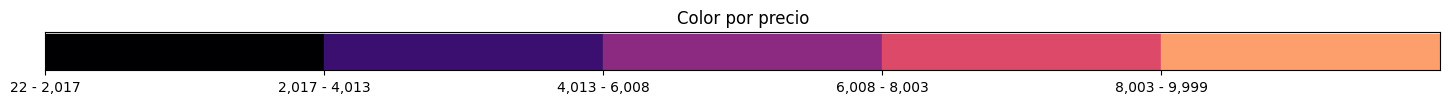

Map(center=[np.float64(40.7083), np.float64(-73.97799)], controls=(ZoomControl(options=['position', 'zoom_in_t…

In [5]:
reduced_df = main_df.sample(n=1000)

prices = reduced_df['price']
normalized_prices = (prices - prices.min()) / (prices.max() - prices.min())

cmap = plt.get_cmap('magma')
colors = [cmap(value) for value in normalized_prices]
hex_colors = ["#{:02x}{:02x}{:02x}".format(int(c[0]*255), int(c[1]*255), int(c[2]*255)) for c in colors]

num_bins = 5
price_bins = np.linspace(reduced_df['price'].min(), reduced_df['price'].max(), num_bins + 1)
legend_colors = [cmap(i / num_bins) for i in range(num_bins)]
legend_hex_colors = [
    "#{:02x}{:02x}{:02x}".format(int(c[0]*255), int(c[1]*255), int(c[2]*255)) 
    for c in legend_colors
]

plt.figure(figsize=(18, 0.5))
for i in range(num_bins):
    plt.fill_between([i, i+1], 0, 1, color=legend_hex_colors[i])
plt.xlim(0, num_bins)
plt.xticks(range(num_bins), [f"{int(price_bins[i]):,} - {int(price_bins[i+1]):,}" for i in range(num_bins)])
plt.yticks([])
plt.title("Color por precio")
plt.show()

locations = list(zip(reduced_df['latitude'], reduced_df['longitude']))

latitudes = reduced_df['latitude']
longitudes = reduced_df['longitude']
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()
map_center = [(lat_min + lat_max) / 2, (lon_min + lon_max) / 2]

map = Map(center=map_center, zoom=12, min_zoom=1, max_zoom=20)

for i, each in enumerate(locations):
    circle = CircleMarker(
        location=list(each),
        radius=6,
        color=hex_colors[i],
        fill_color=hex_colors[i],
        fill_opacity=0.6
    )
    map.add_layer(circle)

map

<h3>Relación entre el precio del alojamiento y el tipo de estancia, el número mínimo de noches, la disponibilidad, el número de reseñas, etc</h3>

/tmp/ipykernel_14561/2467605763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='room_type', y='price', ax=ax1, palette='magma')
/tmp/ipykernel_14561/2467605763.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='minimum_nights', y='price', ax=ax2, palette='magma')
/tmp/ipykernel_14561/2467605763.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='number_of_reviews', y='price', ax=ax3, palette='magma')


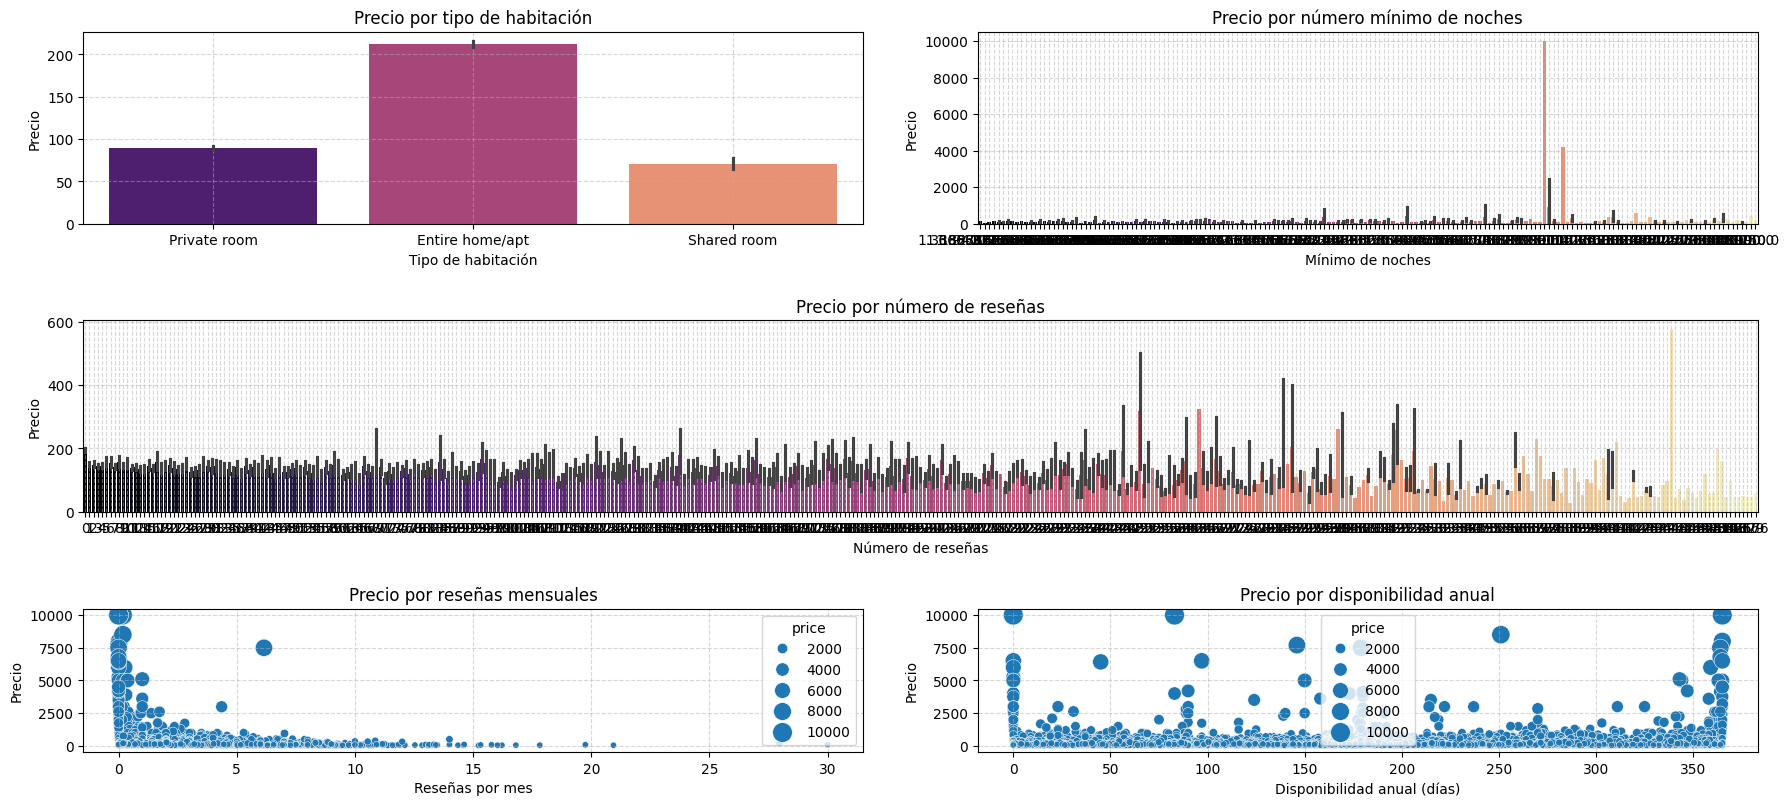

In [6]:
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[0.8, 0.8, 0.6])

# Price by room type
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=main_df, x='room_type', y='price', ax=ax1, palette='magma')
ax1.set_title('Precio por tipo de habitación')
ax1.set_xlabel('Tipo de habitación')
ax1.set_ylabel('Precio')
ax1.grid(True, linestyle='--', alpha=0.5)

# Price by minimum nights
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=main_df, x='minimum_nights', y='price', ax=ax2, palette='magma')
ax2.set_title('Precio por número mínimo de noches')
ax2.set_xlabel('Mínimo de noches')
ax2.set_ylabel('Precio')
ax2.grid(True, linestyle='--', alpha=0.5)

# Price by number of reviews
ax3 = fig.add_subplot(gs[1, :])
sns.barplot(data=main_df, x='number_of_reviews', y='price', ax=ax3, palette='magma')
ax3.set_title('Precio por número de reseñas')
ax3.set_xlabel('Número de reseñas')
ax3.set_ylabel('Precio')
ax3.grid(True, linestyle='--', alpha=0.5)

# Price by reviews per month
ax4 = fig.add_subplot(gs[2, 0])
sns.scatterplot(data=main_df, x='reviews_per_month', y='price', size='price', sizes=(20, 200), ax=ax4)
ax4.set_title('Precio por reseñas mensuales')
ax4.set_xlabel('Reseñas por mes')
ax4.set_ylabel('Precio')
ax4.grid(True, linestyle='--', alpha=0.5)

# Price by annual availability
ax5 = fig.add_subplot(gs[2, 1])
sns.scatterplot(data=main_df, x='availability_365', y='price', size='price', sizes=(20, 200), ax=ax5)
ax5.set_title('Precio por disponibilidad anual')
ax5.set_xlabel('Disponibilidad anual (días)')
ax5.set_ylabel('Precio')
ax5.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(h_pad=2, w_pad=3)
plt.subplots_adjust(top=0.95, bottom=0.05)
plt.show()

Vistas las siguientes gráficas podemos determinar lo siguiente:
- Los apartamentos completo tienen los precios más altos en promedio, mientras que las habitaciones compartidas tienen los más bajos.
- La mayoría de los alojamientos tienen precios relativamente bajos, incluso con requisitos de noches mínimas más altas.
- Los alojamientos con más reseñas tienden a tener precios variados, aunque muchos parecen concentrarse en un rango de precio medio-bajo. Además, algunos alojamientos con pocas reseñas tienen precios muy altos.
- La mayoría de los alojamientos con precios altos tienen pocas reseñas mensuales (posiblemente alojamientos exclusivos o de bajo volumen). Los precios más bajos corresponden a alojamientos que tienen un flujo constante de reseñas mensuales.
- La disponibilidad anual varía significativamente, pero hay una concentración notable en alojamientos con alta disponibilidad (más de 300 días). Algunos de los precios más altos corresponden a propiedades con disponibilidad limitada.

<h3>Relación entre el tipo de estancia y la cantidad de reviews</h3>

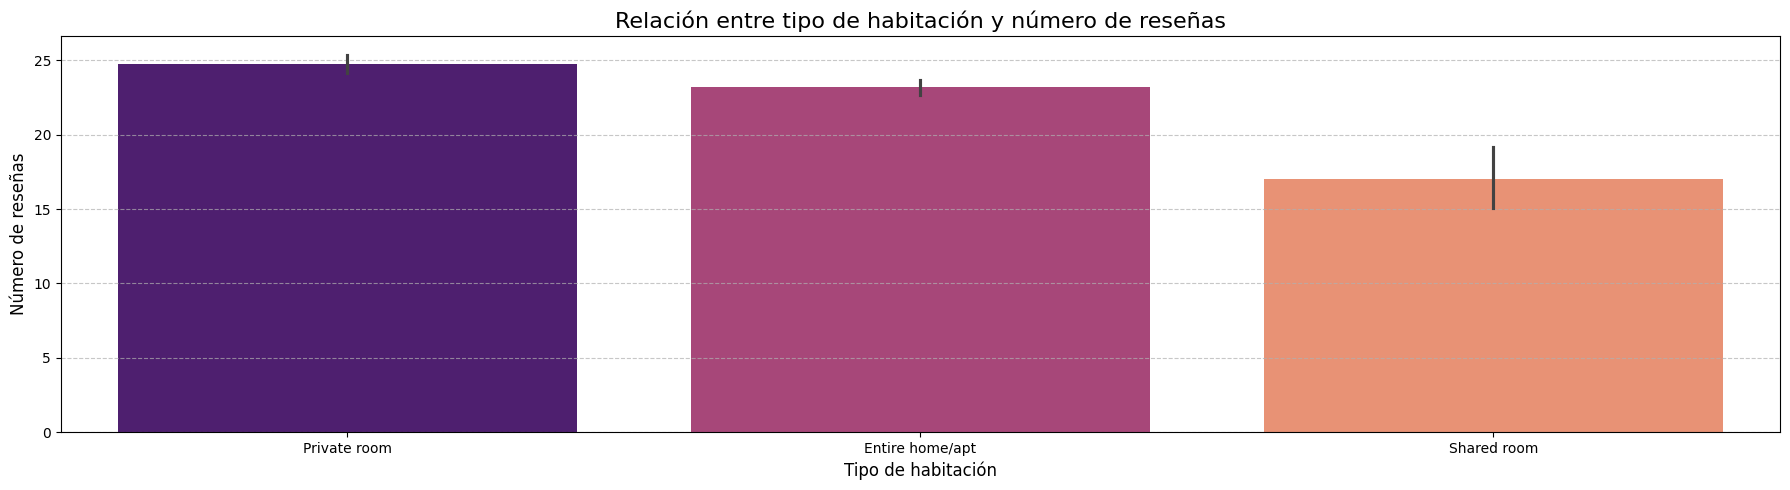

In [7]:
plt.figure(figsize=(18, 5))

sns.barplot(data=main_df, x='room_type', y='number_of_reviews', hue='room_type', dodge=False, palette='magma', legend=False)

plt.title('Relación entre tipo de habitación y número de reseñas', fontsize=16)
plt.xlabel('Tipo de habitación', fontsize=12)
plt.ylabel('Número de reseñas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Podemos determinar que las habitaciones privadas son el tipo de estancia favorita, seguidas muy de cerca por los apartamentos completos y, con algo más de diferencia, por las habitaciones compartidas.